In [ ]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/skillsEval/skillsEval

/content/drive/My Drive/skillsEval/skillsEval


# SCULL STRIPPING

In [ ]:
!pip install simpleitk

     |████████████████████████████████| 48.4 MB 2.3 MB/s 


In [ ]:
!pip install fslpy

     |████████████████████████████████| 275 kB 5.2 MB/s 


In [ ]:
import os

!sudo apt -qq install file

!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py

fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!. ${FSLDIR}/etc/fslconf/fsl.sh

!flirt -version

The following additional packages will be installed:
  libmagic-mgc libmagic1
The following NEW packages will be installed:
  file libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 275 kB of archives.
After this operation, 5,297 kB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmagic-mgc.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2u

In [ ]:
!pip install nilearn

     |████████████████████████████████| 10.0 MB 4.2 MB/s 


In [ ]:
!pip install nipype
import nipype.interfaces.fsl as fsl
mybet = fsl.BET(in_file='ct.nii', out_file='bar.nii')
result = mybet.run()

211220-12:32:58,610 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


In [ ]:
from nilearn.plotting import plot_anat
import numpy as np
import os

In [ ]:
from nilearn.plotting import plot_anat
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


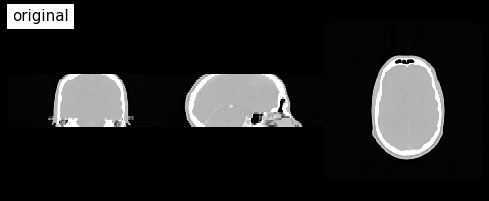

In [ ]:
plot_anat('ct.nii', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

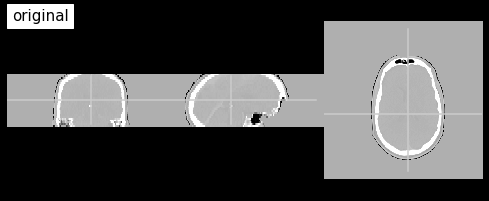

In [ ]:
plot_anat('bar.nii.gz', title='original', dim=-1, draw_cross=True, annotate=False);

In [ ]:
mybet1 = fsl.BET(in_file='mr.nii', out_file='mr_brain_stripped.nii')
result = mybet1.run()

211220-12:34:57,678 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


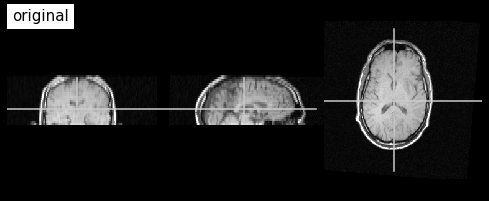

In [ ]:
plot_anat('mr.nii', title='original', dim=-1, draw_cross=True, annotate=False);

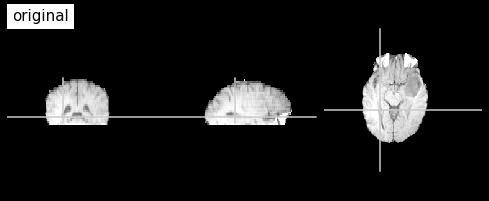

In [ ]:
plot_anat('mr_brain_stripped.nii.gz', title='original', dim=-1, draw_cross=True, annotate=False);

# REGISTRATION

In [ ]:
import SimpleITK as sitk

In [ ]:
run gui.py

Utility Functions

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output

# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_images(fixed_image_z, moving_image_z, fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1,2,figsize=(10,8))
    
    # Draw the fixed image in the first subplot.
    plt.subplot(1,2,1)
    plt.imshow(fixed_npa[fixed_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('fixed image')
    plt.axis('off')
    
    # Draw the moving image in the second subplot.
    plt.subplot(1,2,2)
    plt.imshow(moving_npa[moving_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('moving image')
    plt.axis('off')
    
    plt.show()

# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space. 
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z] 
    plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()
    
# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations
    
    metric_values = []
    multires_iterations = []

# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations
    
    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()

# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations
    
    metric_values.append(registration_method.GetMetricValue())                                       
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, 'r')
    plt.plot(multires_iterations, [metric_values[index] for index in multires_iterations], 'b*')
    plt.xlabel('Iteration Number',fontsize=12)
    plt.ylabel('Metric Value',fontsize=12)
    plt.show()
    
# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the 
# metric_values list. 
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))

In [ ]:
fixed_image =  sitk.ReadImage("bar.nii.gz", sitk.sitkFloat32)
moving_image = sitk.ReadImage("mr_brain_stripped.nii", sitk.sitkFloat32) 

In [ ]:
interact(display_images, fixed_image_z=(0,fixed_image.GetSize()[2]-1), moving_image_z=(0,moving_image.GetSize()[2]-1), fixed_npa = fixed(sitk.GetArrayViewFromImage(fixed_image)), moving_npa=fixed(sitk.GetArrayViewFromImage(moving_image)));

interactive(children=(IntSlider(value=14, description='fixed_image_z', max=28), IntSlider(value=12, descriptio…

In [ ]:
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

moving_resampled = sitk.Resample(moving_image, fixed_image, initial_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

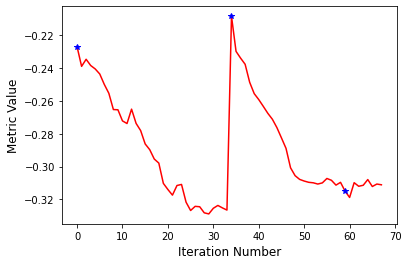

In [ ]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.            
registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations) 
registration_method.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(registration_method))

final_transform = registration_method.Execute(sitk.Cast(fixed_image, sitk.sitkFloat32), 
                                               sitk.Cast(moving_image, sitk.sitkFloat32))

In [ ]:
print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
print('Optimizer\'s stopping condition, {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

Final metric value: -0.31025369247173257
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.


In [ ]:
moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2] - 1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));

interactive(children=(IntSlider(value=14, description='image_z', max=28), FloatSlider(value=0.5, description='…

In [ ]:
print(final_transform)

itk::simple::Transform
 CompositeTransform (0x55648c4f2580)
   RTTI typeinfo:   itk::CompositeTransform<double, 3u>
   Reference Count: 1
   Modified Time: 182508
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (0x55648c4f01e0)
     RTTI typeinfo:   itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 182349
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.999907 0.0122039 -0.00611916 
       -0.0121024 0.999793 0.0163617 
       0.00631757 -0.0162861 0.999847 
     Offset: [17.0798, -29.2546, -24.2684]
     Center: [166.994, 166.994, 56]
     Translation: [18.7596, -30.3939, -25.9416]
     Inverse: 
       0.999907 -0.0121024 0.00631757 
       0.0122039 0.999793 -0.0162861 
       -0.00611916 0.0163617 0.999847 
     Singular: 0
     Euler's angles: AngleX=-0.0162868 AngleY=-0.00631845 AngleZ=-0.0122059
     m_ComputeZYX = 0
   End of MultiTra






# REFERENCES

https://gist.github.com/vfmatzkin/7987a6edf034d28427696e1fabbb2979

https://nipype.readthedocs.io/en/0.12.1/users/interface_tutorial.html

https://nilearn.github.io/stable/plotting/index.html

# Surface Registration

In [ ]:
!pip install itk

     |████████████████████████████████| 20.3 MB 1.2 MB/s 
     |████████████████████████████████| 54.5 MB 26 kB/s 
     |████████████████████████████████| 16.6 MB 807 kB/s 
     |████████████████████████████████| 95.3 MB 36 kB/s 
     |████████████████████████████████| 70.6 MB 8.3 kB/s 
     |████████████████████████████████| 15.0 MB 329 kB/s 


In [ ]:
import itk
#itk.ImageToMeshFilter("mr_brain_stripped.nii","output.nii.gz")

In [ ]:
import SimpleITK as sitk
import numpy as np
import os
import cv2
b = sitk.GetArrayFromImage(sitk.ReadImage("bacteria.mha"))

for i in range(len(b)):
    cv2.imwrite('img'+str(i)+'.jpg',b[i])